<a href="https://colab.research.google.com/github/TimHBSWFL/ML-Practice-Exercises/blob/main/ML_Iris_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

<Axes: >

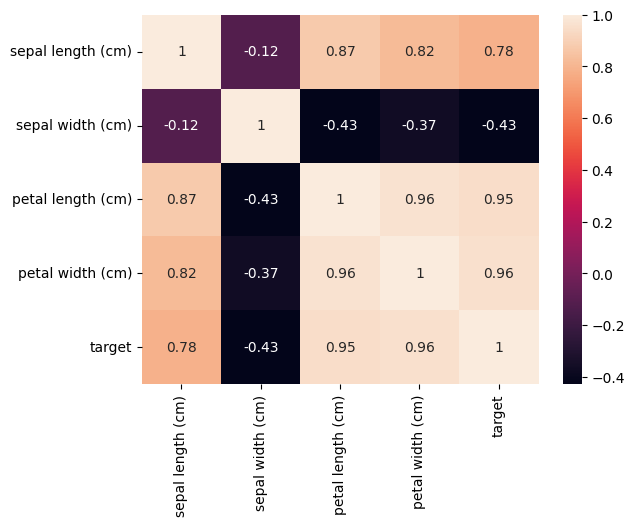

In [8]:
correlation = df.corr()
sns.heatmap(correlation, annot=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], test_size=0.2, random_state=42)

In [10]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [11]:
continuous_transform = MinMaxScaler()

continuous_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

preprocessor = ColumnTransformer(
    transformers=[
        ('continuous', continuous_transform, continuous_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous', MinMaxScaler(),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('model', DecisionTreeClassifier())])

In [12]:
y_pred = pipeline.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [13]:
score = pipeline.score(X_test, y_test)
print(f"Accuracy Score: {score}")

Accuracy Score: 1.0


In [14]:
param_grid = {
    'model__max_depth': [None, 2, 5, 10],
    'model__criterion': ['gini', 'entropy'],
    'model__splitter': ['best', 'random']
}


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")
print(f"Best Model: {best_model}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END model__criterion=gini, model__max_depth=None, model__splitter=best; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=None, model__splitter=best; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=None, model__splitter=best; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=None, model__splitter=random; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=None, model__splitter=random; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=None, model__splitter=random; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=2, model__splitter=best; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=2, model__splitter=best; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=2, model__splitter=best; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=2, model__splitter=random; to

In [15]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous', MinMaxScaler(),
                                                  ['sepal length (cm)',
                                                   'sepal width (cm)',
                                                   'petal length (cm)',
                                                   'petal width (cm)'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, splitter='random'))])

In [16]:
y_pred = best_model.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 1 1 1 1 0 0 0 0 1 2 1 1 2 0 2 0 2 2 1 2 2 0 0]


In [17]:
score = best_model.score(X_test, y_test)
print(f"Best Model Accuracy Score: {score}")

Best Model Accuracy Score: 0.9


In [18]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(criterion='gini', max_depth=2, splitter='best'))
])

pipeline.fit(X_train, y_train)

score = pipeline.score(X_test, y_test)
print(f"Best Model Accuracy Score: {score}")

Best Model Accuracy Score: 0.9666666666666667


In [19]:
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of DecisionTreeClassifier: {mae}")

Mean Absolute Error of DecisionTreeClassifier: 0.03333333333333333
